# Construir Dataset

30 muestras tomadas de https://github.com/hellodfan/GrainSpace

The GrainSpace dataset is licensed under the Creative Commons BY-NC-SA 4.0 license. Note that All data must not be used for commercial purposes.

## Etiquetar

Tag YOLO usando [label-img](https://github.com/HumanSignal/labelImg)


## Calcular features con traitor

fork https://github.com/hordiales/traitor/tree/main

cd Dataset-build

$ conda activate agro

$ python 1_process_features.py MaizTest

$ python 2_read_yolo_tag_and_append.py MaizTest_measurements.csv MaizTest

$ python 3_filter_csv.py MaizTest_measurements_with_YOLO.csv

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv("filtered_by_min_error.csv")

# Define the feature columns and the target column
features = [
    'aspect_ratio', 'area', 'perimeter', 'surface_structure',
    'solidity', 'circularity'
]
target = 'tag_class_number'

# Handle missing values (optional step: drop or fill)
df = df.dropna(subset=features + [target])  # Ensure no missing values
df = df[features+[target]]
df.head()

,aspect_ratio,area,perimeter,surface_structure,solidity,circularity,tag_class_number
0,0.448413,19966,699.470129,0.885365,0.910567,0.512817,4
1,0.924658,78802,1115.899495,1.000000,0.999810,0.795238,0
2,0.519231,3431,478.901587,0.633317,0.633260,0.187991,6
3,0.732852,27439,1766.749350,0.538089,0.491685,0.110466,0
4,0.864865,118390,1373.656854,1.000000,0.999975,0.788439,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aspect_ratio       30 non-null     float64
 1   area               30 non-null     int64  
 2   perimeter          30 non-null     float64
 3   surface_structure  30 non-null     float64
 4   solidity           30 non-null     float64
 5   circularity        30 non-null     float64
 6   tag_class_number   30 non-null     int64  
dtypes: float64(5), int64(2)
memory usage: 1.8 KB


In [ ]:
df.describe()

,aspect_ratio,area,perimeter,surface_structure,solidity,circularity,tag_class_number
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.621023,37174.866667,1003.011800,0.830137,0.798996,0.477796,4.666667
std,0.175532,33471.538610,592.241484,0.198333,0.231604,0.277583,2.669539
min,0.312500,184.000000,74.597980,0.482503,0.305133,0.071815,0.000000
25%,0.482133,16125.750000,712.163257,0.603686,0.649850,0.143534,4.000000
50%,0.605057,30321.500000,965.242641,0.934942,0.928365,0.507484,6.000000
75%,0.760486,56268.750000,1385.510019,1.000000,0.999912,0.721247,7.000000
max,0.924658,131985.000000,2409.342279,1.000000,0.999975,0.795658,8.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.30      0.30      0.27         6
weighted avg       0.42      0.33      0.33         6



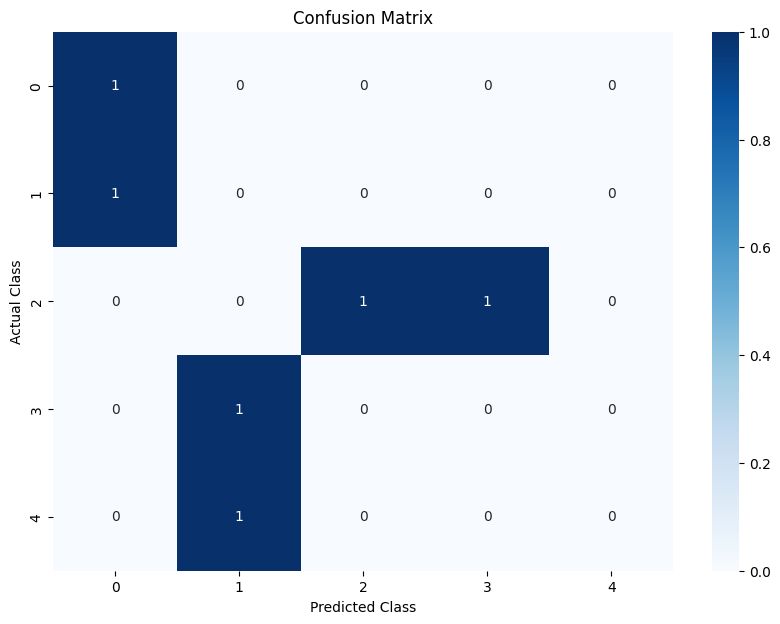

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate accuracy metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()